<a href="https://colab.research.google.com/github/Adn02/Intro-to-ML/blob/main/Homework/HW2/HW2Q1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries and Housing Dataset**

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

url = "https://raw.githubusercontent.com/Adn02/Intro-to-ML/main/Datasets/Housing.csv"
hf = pd.read_csv(url)

**Pre-processing without Normalization/Standardization**

In [5]:
variable_list = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
furnishing_status = ['furnishingstatus']

def binary_mapping(x):
  return x.map({'no' : 0, 'yes' : 1})

def integer_mapping(x):
  return x.map({'unfurnished' : 0, 'semi-furnished' : 1, 'furnished' : 2})

hf[variable_list] = hf[variable_list].apply(binary_mapping)
hf[furnishing_status] = hf[furnishing_status].apply(integer_mapping)

np.random.seed(1)
df_training, df_validation = train_test_split(hf, train_size = 0.8, test_size = 0.2, random_state = 100)

y_train = df_training.pop('price')
total_train = df_training

y_valid = df_validation.pop('price')
total_valid = df_validation

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:402: RuntimeWarning: overflow encountered in square
  result = getattr(ufunc, method)(*inputs, **kwargs)
<ipython-input-6-20a615e1f139>:24: RuntimeWarning: invalid value encountered in subtract
  theta -= (learning_rate * gradient)


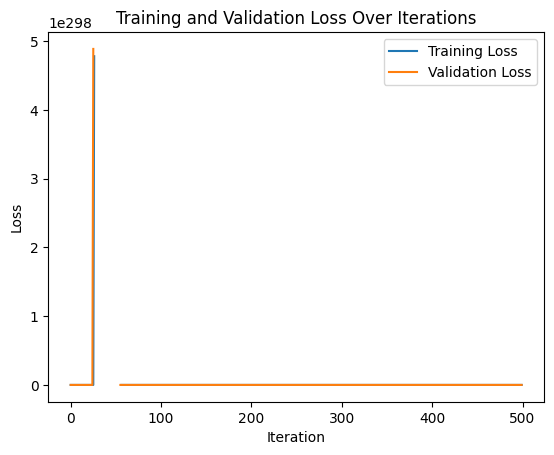

In [6]:
inputs = ['area', 'bedrooms', 'bathrooms','stories', 'parking']

training_inputs = df_training[inputs]
x_train = np.c_[np.ones((len(training_inputs), 1)), training_inputs]

validation_inputs = df_validation[inputs]
x_valid = np.c_[np.ones((len(validation_inputs), 1)), validation_inputs]

n = x_train.shape[1]
m_train = len(x_train)
m_valid = len(x_valid)
theta = np.zeros(n)

learning_rate = 0.01
iterations = 500
train_losses = []
valid_losses = []

for i in range(iterations):
  h_theta = x_train.dot(theta)
  error = np.subtract(h_theta, y_train)
  gradient = (1 / m_train) * (x_train.transpose().dot(error))

  theta -= (learning_rate * gradient)

  train_loss = 1 / ( 2 * m_train) * np.sum(np.square((h_theta - y_train)))
  valid_loss = 1 / ( 2 * m_valid) * np.sum(np.square((x_valid.dot(theta) - y_valid)))

  train_losses.append(train_loss)
  valid_losses.append(valid_loss)

plt.plot(train_losses, label="Training Loss")
plt.plot(valid_losses, label="Validation Loss")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss Over Iterations")
plt.show()